# Changing Colors

In [1]:
(ns opencv4.changesomecolors
 (:require
  [opencv4.core :refer :all]
  [opencv4.colors.rgb :as rgb]
  [opencv4.utils :as u]))

nil

change RGB value of pixel based on threshold use two thresholds, one for min values, and one for max values
[change rgb based on threshold](https://stackoverflow.com/questions/45335691/change-rgb-value-of-pixel-based-on-threshold-opencv-c/45338692#45338692)

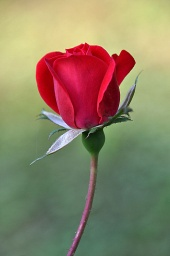

In [3]:
(def original
  (imread "resources/chapter03/rose.jpg" IMREAD_REDUCED_COLOR_4))

(u/>>> original)

In [4]:
(-> (u/matrix-to-mat [[100 255 200]
                      [100 255 200]
                      [100 255 200]])
	(threshold! 150 255 THRESH_BINARY)
    (dump))

[0 255 255]
[0 255 255]
[0 255 255]


nil

In [5]:
(-> (u/matrix-to-mat [[100 255 200]
                      [100 255 200]
                      [100 255 200]])
	(threshold! 150 255 THRESH_BINARY)
    (dump))

[0 255 255]
[0 255 255]
[0 255 255]


nil

In [6]:
(-> (u/matrix-to-mat [[0 0 170]
                      [0 0 170]
                      [100 100 0]])
	(cvt-color! COLOR_GRAY2BGR)
    (threshold! 150 255 THRESH_BINARY)
    (dump))

[0 0 0 0 0 0 255 255 255]
[0 0 0 0 0 0 255 255 255]
[0 0 0 0 0 0 0 0 0]


nil

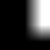

In [8]:
(-> (u/matrix-to-mat [[0 0 170]
                      [0 0 170]
                      [100 100 0]])
	(cvt-color! COLOR_GRAY2BGR)
    (resize! (new-size 50 50) 1 1 INTER_AREA)
    (u/>>>))

(-> (u/matrix-to-mat [[0 0 170]
                      [0 0 170]
                      [100 100 0]])
	(cvt-color! COLOR_GRAY2BGR)
    (threshold! 150 255 THRESH_BINARY)
    (resize! (new-size 50 50) 0 0 INTER_LINEAR)
    (u/>>>))

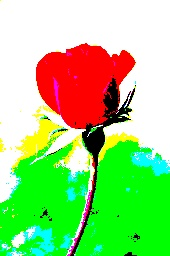

In [9]:
(->
  original
  (clone)
  (threshold! 100 255 THRESH_BINARY)  
  (u/>>>))

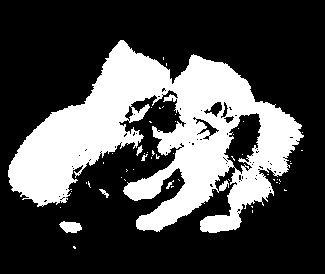

In [10]:
(-> "resources/chapter03/ai6.jpg"
  (imread  IMREAD_REDUCED_COLOR_2)
  (u/>>>))

(-> "resources/chapter03/ai6.jpg"
  (imread  IMREAD_REDUCED_GRAYSCALE_2)
  (threshold! 100 255 THRESH_BINARY)
  (u/>>>))

In [11]:
(defn low-high!
  ([image t1 color1 color2 ]
    (low-high! image t1 255 THRESH_BINARY color1 t1 255 THRESH_BINARY_INV color2))
  ([image a1 a2 a3 color1 b1 b2 b3 color2 ]
  (let [_copy (-> image clone (cvt-color! COLOR_BGR2HSV))
        _work (clone image)
        _thresh-1 (new-mat)
        _thresh-2 (new-mat)]

    (threshold _copy _thresh-1 a1 a2 a3)
    (cvt-color! _thresh-1 COLOR_BGR2GRAY)
    (set-to _work color1 _thresh-1)

    (threshold _copy _thresh-2 b1 b2 b3)
    (cvt-color! _thresh-2 COLOR_BGR2GRAY)
    (set-to _work color2 _thresh-2)
    _work)))

#'opencv4.changesomecolors/low-high!

In [12]:
(defn low-high!
  ([image t1 color1 color2 ]
  (let [_copy (-> image clone (cvt-color! COLOR_BGR2HSV))
        _work (clone image)
        _thresh-1 (new-mat)
        _thresh-2 (new-mat)]

    (threshold _copy _thresh-1 t1 255 THRESH_BINARY)
    (cvt-color! _thresh-1 COLOR_BGR2GRAY)
    (set-to _work color1 _thresh-1)

    ;(threshold _copy _thresh-2 t1 255 THRESH_BINARY_INV)
    ;(cvt-color! _thresh-2 COLOR_BGR2GRAY)
    (set-to _work color2 (bitwise-not! _thresh-1))
    _work)))

#'opencv4.changesomecolors/low-high!

In [26]:
(->
(imread "resources/chapter02/rose.jpg" IMREAD_REDUCED_COLOR_4)
(low-high! 150 rgb/white-smoke- rgb/lightblue-1)
(u/>>>))

CompilerException java.lang.RuntimeException: No such var: rgb/white-smoke-, compiling:(/tmp/form-init5010195155217704124.clj:3:1) 


class clojure.lang.Compiler$CompilerException: 